# Mass Manufacture of Spectrograms

In [1]:
import komod
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
import pickle
from glob import glob
import os
import re

## First Round

In [15]:
spectro_dict = komod.make_spectrograms()

set()
ns0001
ns0002
ns0003
ns0004
ns0005
ns0006
ns0007
ns0008
ns0009
ns0010
ns0011
ns0012
ns0013
ns0014
ns0015
ns0016
ns0017
ns0018
ns0019
ns0020
ns0021
ns0022
ns0023
ns0024
ns0025
ns0500
ns0503
ns0504
ns0505
ns0506
ns0508
ns0511
sc0001
sc0002
sc0003
sc0500
sc0507
sc0508
sc0512
sc0514
ss0001
ss0002
ss0003
ss0004
ss0005
ss0006
ss0007
ss0008
ss0009
ss0010
ss0011
ss0501
ss0504
ss0506
ss0507
ss0508
ss0509
ss0510
ss0512


In [16]:
spectro_dict

{'ns0001': array([[  3.82226172e-06,   3.66371471e-06,   3.16316897e-06, ...,
           3.79631911e-02,   2.18468700e-01,   4.84723271e-01],
        [  7.41797041e-06,   7.11027378e-06,   6.13885064e-06, ...,
           7.36762287e-02,   4.23988327e-01,   9.40716034e-01],
        [  4.83899466e-06,   4.64851776e-06,   3.73334753e-06, ...,
           5.02138496e-02,   3.95846542e-01,   8.78916997e-01],
        ..., 
        [  1.39305113e-09,   1.04270252e-09,   4.36487868e-10, ...,
           7.35608436e-06,   4.11516571e-05,   8.76332496e-05],
        [  1.31656499e-09,   9.78480321e-10,   3.78726668e-10, ...,
           9.46793088e-06,   5.51445406e-05,   1.18562331e-04],
        [  1.17602143e-09,   8.57975802e-10,   2.97370759e-10, ...,
           3.40223523e-06,   1.62191793e-05,   3.30510317e-05]]),
 'ns0002': array([[  3.04565685e-04,   3.42045313e-04,   1.13334446e-04, ...,
           4.42391642e-03,   2.05673443e-02,   4.04569338e-02],
        [  5.91079159e-04,   6.63816923e

In [20]:
# add unpickling/pickling function to make_spectrograms()

with open('../data/spectros.txt', 'wb') as fp:
    pickle.dump(spectro_dict, fp)

## Second Round


Naming convention has been changed, now we just want to make spectros of all the available .wav samples and save in their own folder.

In [2]:
fpath = "../audio/wav_chunked"
os.path.join(fpath, '000123' + '.wav')

'../audio/wav_chunked/000123.wav'

In [9]:
np.random.randint(22000)

6935

If we were to normalize, where would that be?

In [15]:
for i in range(10):
    chunk_id = str(np.random.randint(22000)).rjust(6,'0')
    spectro_test = komod.make_spectro('../audio/wav_chunked/' + chunk_id + '.wav')

    print("\nChunk ID:", chunk_id)
    print("Shape:", spectro_test.shape)
    print("Min:", spectro_test.min())
    print("Max:", spectro_test.max())


Chunk ID: 001618
Shape: (512, 431)
Min: 1.67909769618e-09
Max: 597.523154291

Chunk ID: 000296
Shape: (512, 431)
Min: 3.75853111803e-09
Max: 846.343675714

Chunk ID: 004865
Shape: (512, 431)
Min: 1.85324652764e-08
Max: 1102.00429615

Chunk ID: 001732
Shape: (512, 431)
Min: 5.46648831016e-09
Max: 9908.87557275

Chunk ID: 002984
Shape: (512, 431)
Min: 1.89928178257e-09
Max: 5383.51859346

Chunk ID: 008892
Shape: (512, 431)
Min: 2.50154221625e-09
Max: 1204.59435075

Chunk ID: 019096
Shape: (512, 431)
Min: 3.08080654223e-12
Max: 0.0562603589802

Chunk ID: 005669
Shape: (512, 431)
Min: 2.39382977678e-09
Max: 1841.5852239

Chunk ID: 011402
Shape: (512, 431)
Min: 1.89291869578e-09
Max: 4227.92079087

Chunk ID: 008919
Shape: (512, 431)
Min: 3.19293235665e-09
Max: 6936.53386426


List of Maxes:
* 000000, a Lickin: 12508
* 000123, fade-out: 17
* 000500, Desafinado guitar solo: 552
* 009907, BP Billy: 6117
* 014475, Fellowship sax solo: 1587
* 001618, Fellowship quiet: 598
* 000296, Blinded By The Light: 846
* 004865, Kenny Garrett sax solo: 1102
* 001732, Gayngs (very compressed): 9909
* 002984, Eric B: 5384
* 008892, Sam Cooke guitar solo: 1205
* 019096, fade-out: 0.1
* 005669, Gilberto vocals: 1842
* 011402, Kristofferson, Beat The Devil vox: 4228
* 008919, Sam Cooke vox: 6937

How to save a numpy array:

In [27]:
np.save('../specs/test', spectro_test)
retrieved = np.load('../specs/test.npy')
print(np.array_equal(spectro_test, retrieved))

True


In [33]:
np.savez_compressed('../specs/testz', spectro_test)
retrievedz = np.load('../specs/testz.npz')
print(np.array_equal(spectro_test, retrievedz['arr_0']))

True


Compression doesn't make that much of a difference for the spectrograms -- 1.8 MB without, 1.7 MB with.

#### And the moment of truth...

In [3]:
komod.batch_spectros()

0 spectrograms created


## Trying New Viz Function

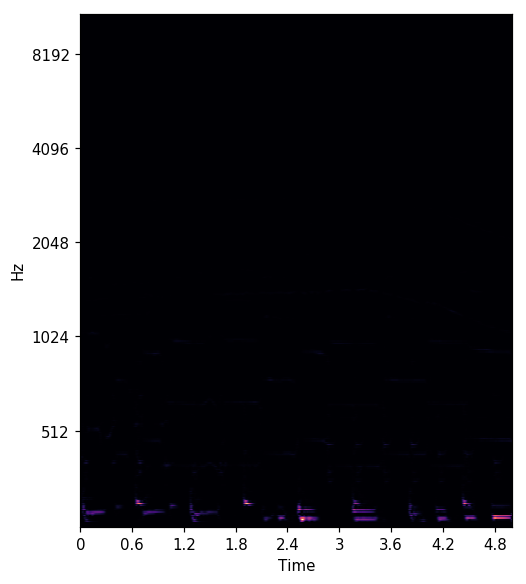

In [3]:
komod.spectro_viz('000050')